# EDA on Haberman Dataset

## About Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of Billings Hospital on the Survival of patients who had undergone surgery for breast cancer.

## Thigs to do with the dataset 
1. Objective
2. Knowing about dataset dimentions, datapoint, features, Univariate / Bivariate data analysis
3. Finding useful features and details
4. Ploting various types of graph and charts for finding relations between different features
5. Which feature is most important for classification of status

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
hab_df = pd.read_csv('haberman.csv')
hab_df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
#dimetions of dataset
hab_df.shape

(306, 4)

In [5]:
hab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### This dataset is not contain any NaN, na or null values 

In [6]:
#knowing about important value of every feature such as mean, min, max, std etc
hab_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Univariate Feature Analysis for dataset 

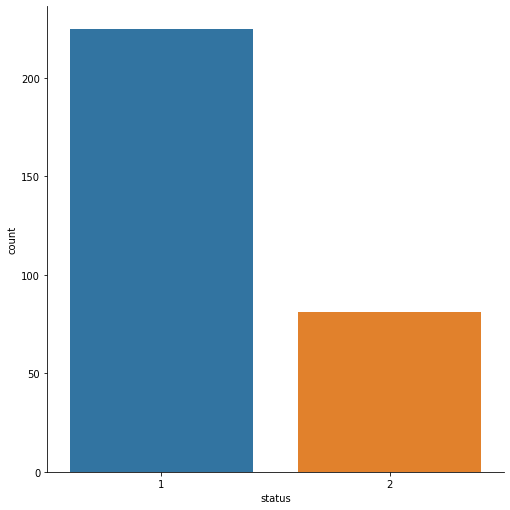

In [7]:
sns.catplot('status', kind = 'count', data = hab_df, size = 7)

In [8]:
hab_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Observation
1. This dataset is seems bias with status 1. because becouse number of rows belonging to status 1 is far more than status 2.
2. Here status 1 means the patient still alive after 5 year of surgery, and status 2 means the patient can't survive after surgery 

In [9]:
hab_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

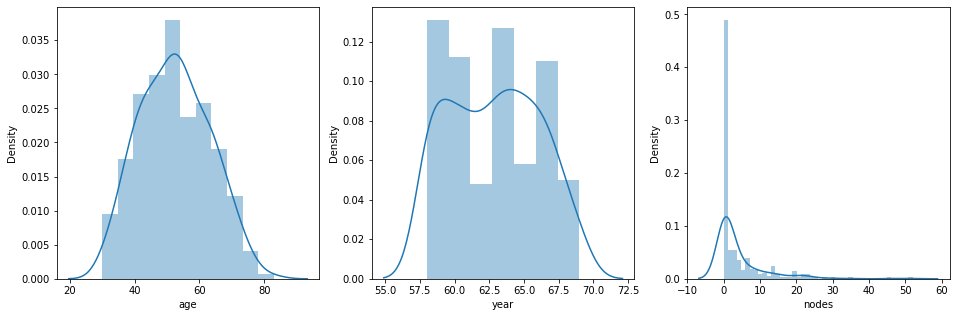

In [10]:
#cl = ['age', 'year', 'nodes']
plt.figure(figsize = (16,5))

plt.subplot(1,3,1)
sns.distplot(hab_df['age'])

plt.subplot(1,3,2)
sns.distplot(hab_df['year'])

plt.subplot(1,3,3)
sns.distplot(hab_df['nodes'])

plt.show()

## Observation 
1. data distribution of age feature is normal distribution
2. data distribution of year feature is near to normal distribution
3. data distribution of nodes feature is skew right distribution

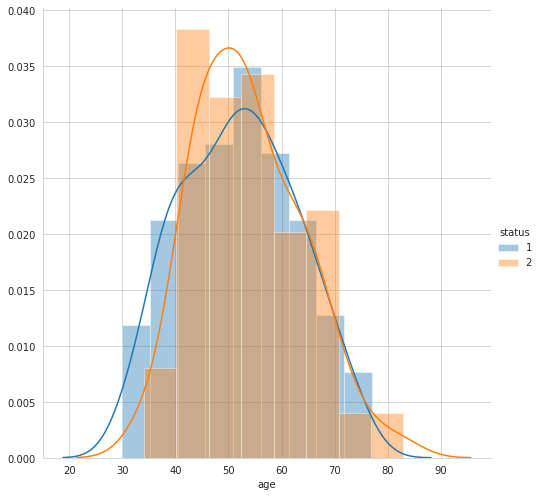

In [11]:
# let check the data distribution of each feature according to status

sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.distplot, 'age')\
   .add_legend()
plt.show()

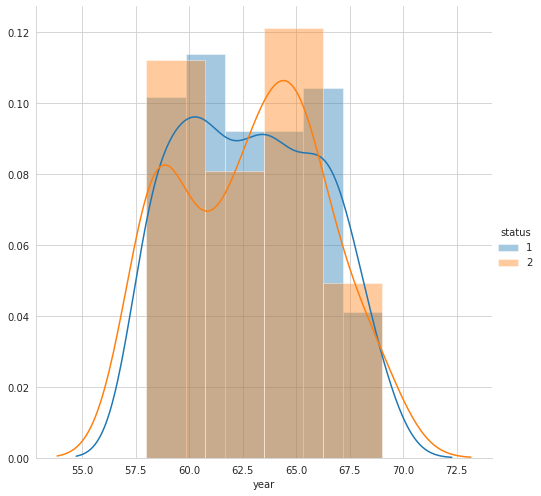

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.distplot, 'year')\
   .add_legend()
plt.show()

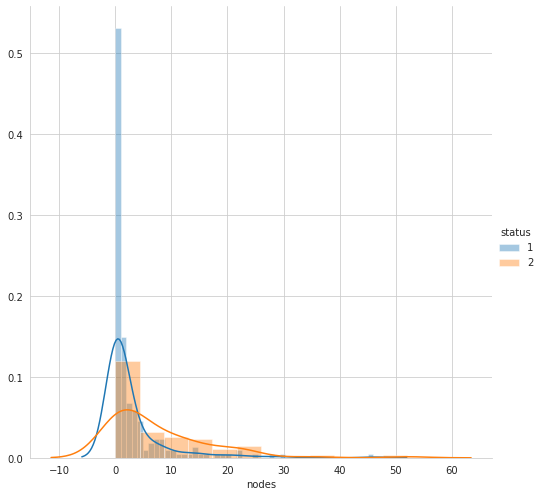

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.distplot, 'nodes')\
   .add_legend()
plt.show()

## Observation
After looking abouve distribution graphs according to status, we can't easily seperate the two statuses from the distribution of any feature. because statuses are badly overlapping in feature distribution.

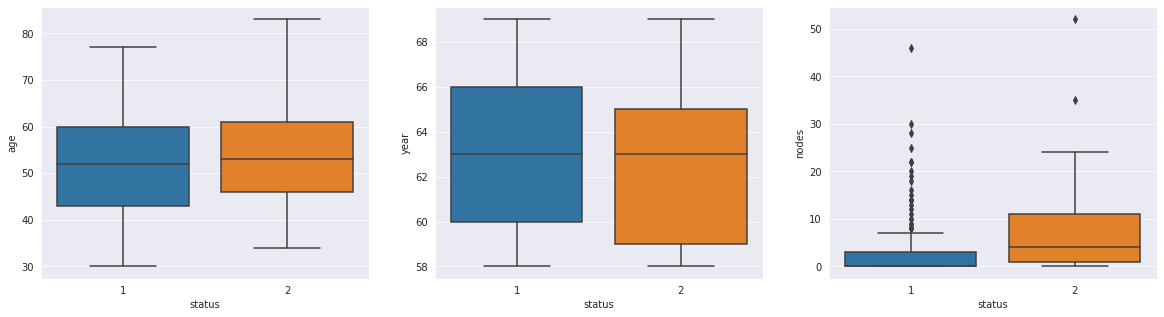

In [37]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(x='status',y='age', data=hab_df)

plt.subplot(1,3,2)
sns.boxplot(x='status',y='year', data=hab_df)

plt.subplot(1,3,3)
sns.boxplot(x='status',y='nodes', data=hab_df)

plt.show()

#### Data distribution is completly overlap on the basis of status 

## Bivariate Feature Analysis of dataset

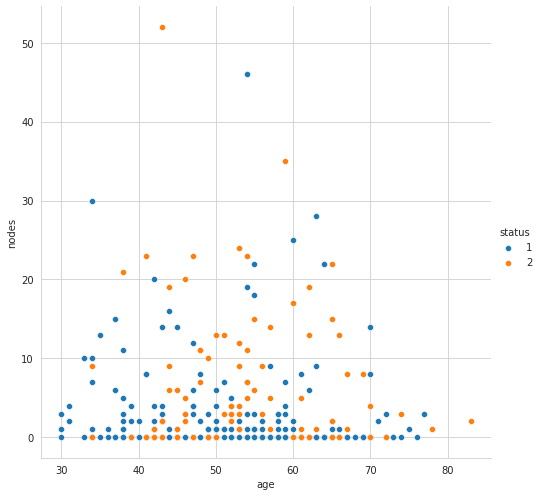

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.scatterplot, 'age', 'nodes')\
   .add_legend()
plt.show()

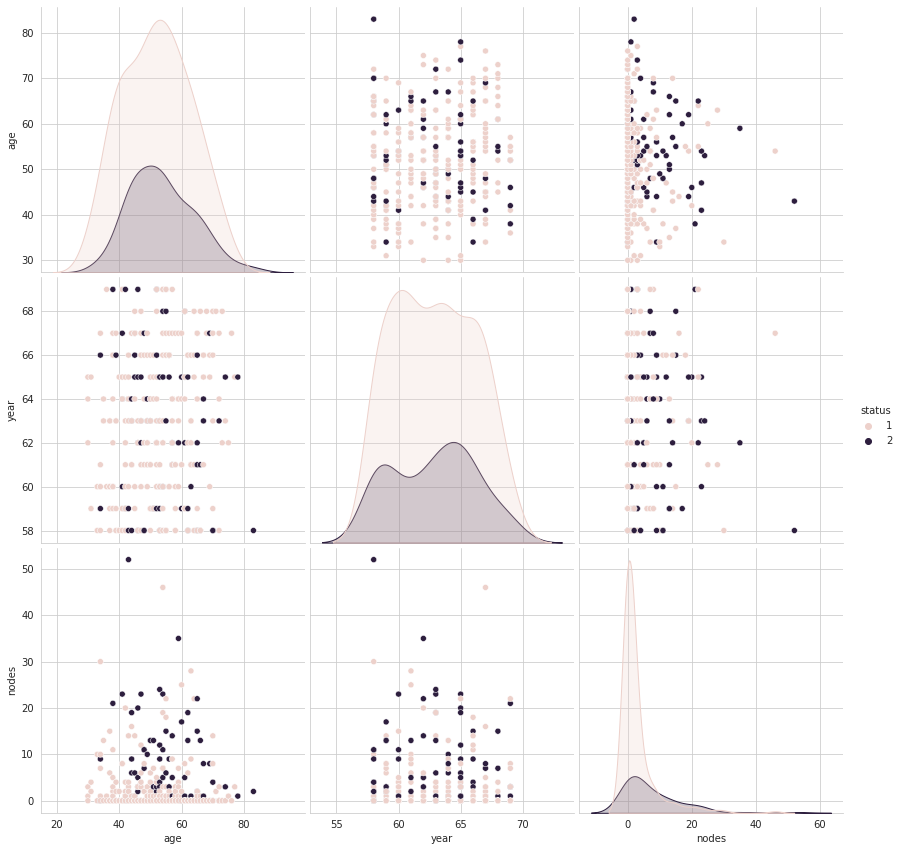

In [22]:
sns.set_style('whitegrid')
sns.pairplot(hab_df, hue = 'status', size = 4)

plt.show()

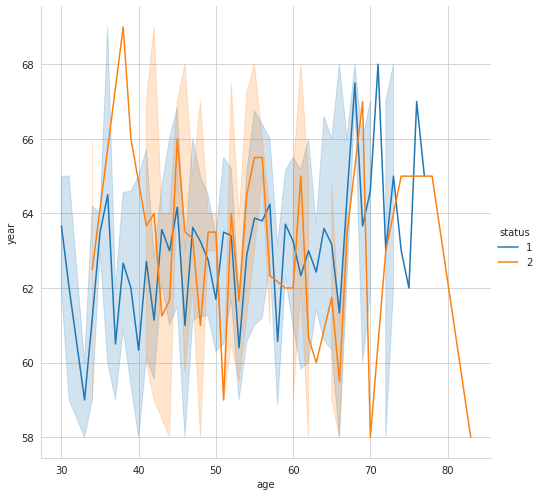

In [24]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.lineplot, 'age', 'year')\
   .add_legend()

plt.show()

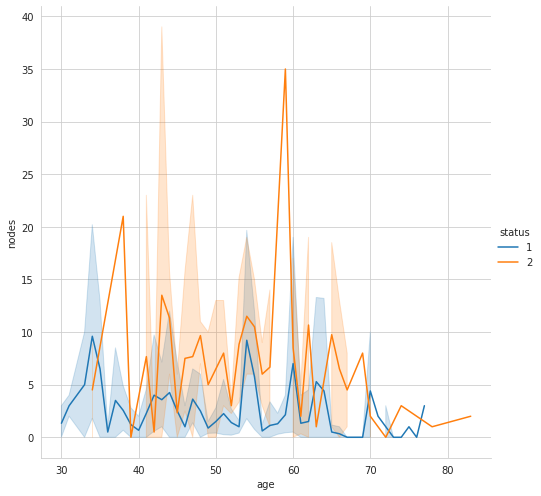

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.lineplot, 'age', 'nodes')\
   .add_legend()

plt.show()

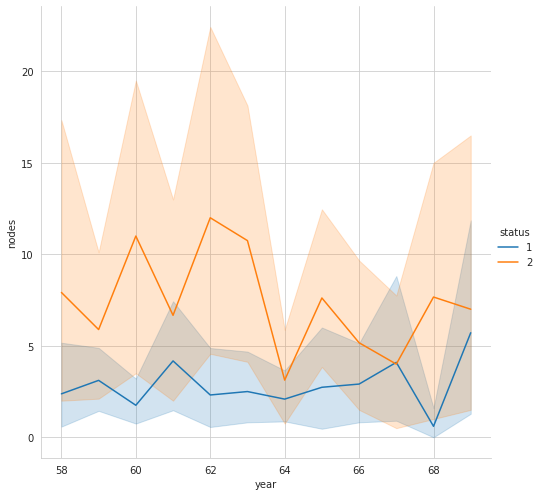

In [26]:
sns.set_style('whitegrid')
sns.FacetGrid(hab_df, hue = 'status', size = 7)\
   .map(sns.lineplot, 'year', 'nodes')\
   .add_legend()

plt.show()

## Observation
After looking above lineplots the nodes feature is seems important because whenever the number of nodes in a year or age is less, then the chances of patient suvival increases.  

### mean, median, std, percentile and quantile or Features

In [48]:
print("Mean of features")
print(np.mean(hab_df['year']))
print(np.mean(hab_df['age']))
print(np.mean(hab_df['nodes']))

print("\nStandard Deviation of features")
print(np.std(hab_df['year']))
print(np.std(hab_df['age']))
print(np.std(hab_df['nodes']))

Mean of features
62.85294117647059
52.45751633986928
4.026143790849673

Standard Deviation of features
3.244090833563246
10.785785203631832
7.177896092811143


In [49]:
print("Median of features")
print(np.median(hab_df['year']))
print(np.median(hab_df['age']))
print(np.median(hab_df['nodes']))

print("\nPercentile of features")
print(np.percentile(hab_df['year'], np.arange(0,100, 25)))
print(np.percentile(hab_df['age'], np.arange(0,100, 25)))
print(np.percentile(hab_df['nodes'], np.arange(0,100, 25)))


Median of features
63.0
52.0
1.0

Percentile of features
[58.   60.   63.   65.75]
[30.   44.   52.   60.75]
[0. 0. 1. 4.]
